<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T2.8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

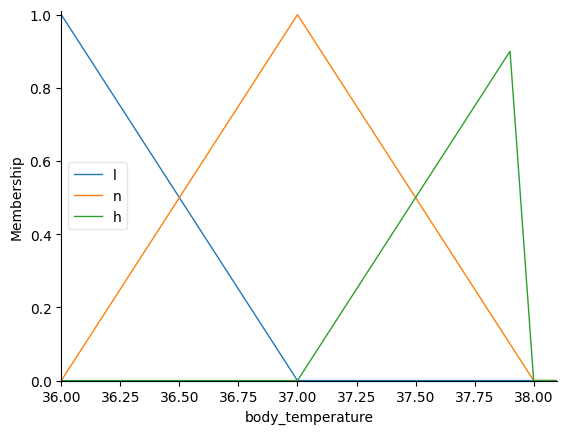

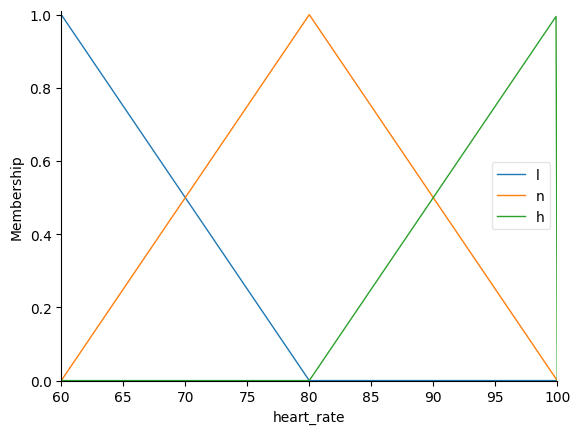

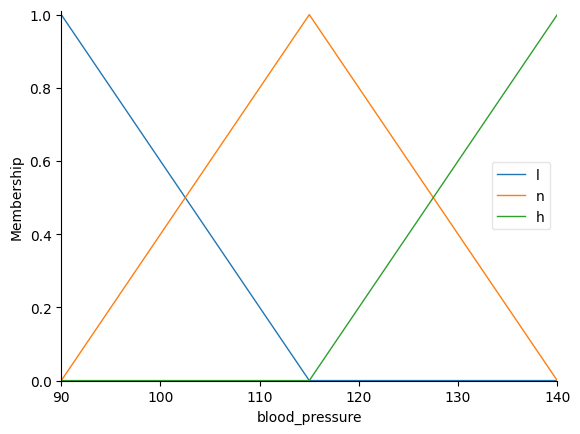

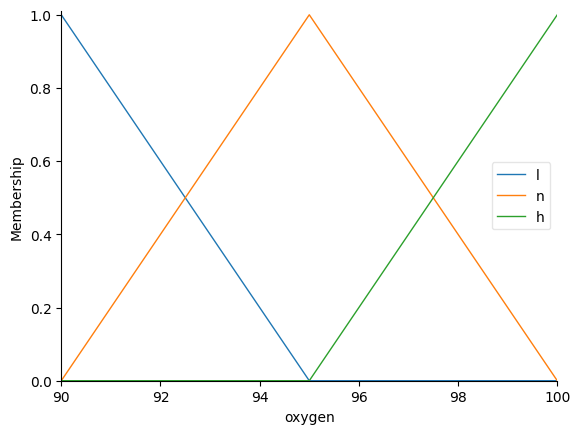

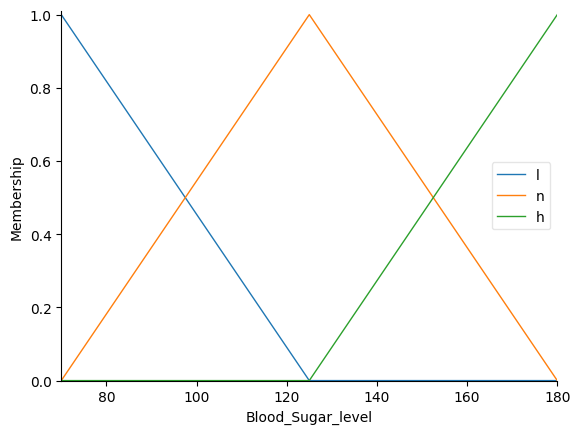

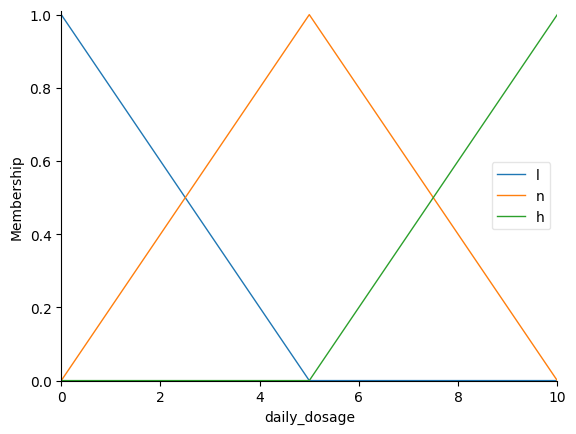

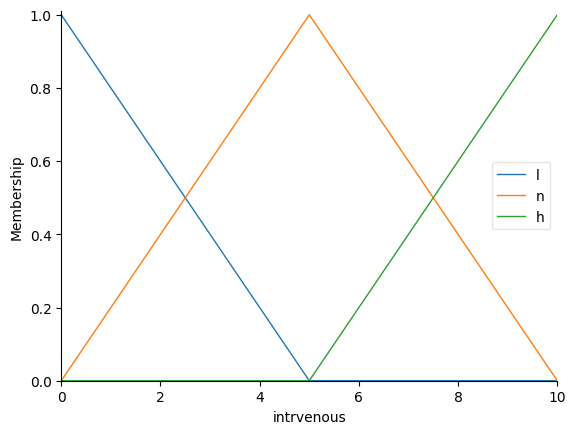

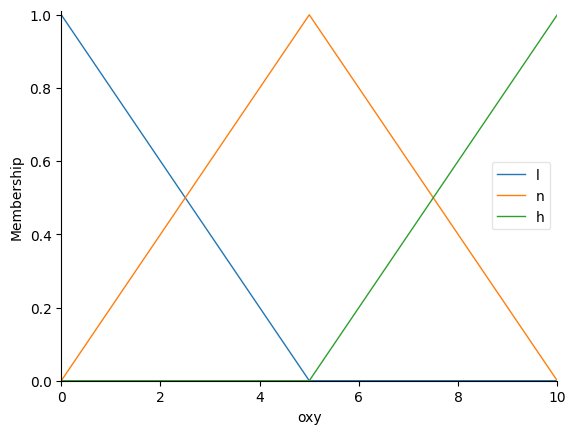

In [ ]:
#2.8 Huyet ap
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
heart_rate=ctrl.Antecedent(np.arange(60,100.1,0.1),'heart_rate')
blood_pressure=ctrl.Antecedent(np.arange(90,140.1,0.1),'blood_pressure')
body_temperature=ctrl.Antecedent(np.arange(36,38.1,0.1),'body_temperature')
oxygen=ctrl.Antecedent(np.arange(90,100.1,0.1),'oxygen')
Blood_Sugar_level=ctrl.Antecedent(np.arange(70,180.1,0.1),'Blood_Sugar_level')
daily_dosage=ctrl.Consequent(np.arange(0,10.1,0.1),'daily_dosage')
intrvenous=ctrl.Consequent(np.arange(0,10.1,0.1),'intrvenous')
oxy=ctrl.Consequent(np.arange(0,10.1,0.1),'oxy')
heart_rate['l']=fuzz.trimf(heart_rate.universe,[60,60,80])
heart_rate['n']=fuzz.trimf(heart_rate.universe,[60,80,100])
heart_rate['h']=fuzz.trimf(heart_rate.universe,[80,100,100])
blood_pressure['l']=fuzz.trimf(blood_pressure.universe,[90,90,115])
blood_pressure['n']=fuzz.trimf(blood_pressure.universe,[90,115,140])
blood_pressure['h']=fuzz.trimf(blood_pressure.universe,[115,140,140])
body_temperature['l']=fuzz.trimf(body_temperature.universe,[36,36,37])
body_temperature['n']=fuzz.trimf(body_temperature.universe,[36,37,38])
body_temperature['h']=fuzz.trimf(body_temperature.universe,[37,38,38])
oxygen['l']=fuzz.trimf(oxygen.universe,[90,90,95])
oxygen['n']=fuzz.trimf(oxygen.universe,[90,95,100])
oxygen['h']=fuzz.trimf(oxygen.universe,[95,100,100])
Blood_Sugar_level['l']=fuzz.trimf(Blood_Sugar_level.universe,[70,70,125])
Blood_Sugar_level['n']=fuzz.trimf(Blood_Sugar_level.universe,[70,125,180])
Blood_Sugar_level['h']=fuzz.trimf(Blood_Sugar_level.universe,[125,180,180])
daily_dosage['l']=fuzz.trimf(daily_dosage.universe,[0,0,5])
daily_dosage['n']=fuzz.trimf(daily_dosage.universe,[0,5,10])
daily_dosage['h']=fuzz.trimf(daily_dosage.universe,[5,10,10])
intrvenous['l']=fuzz.trimf(intrvenous.universe,[0,0,5])
intrvenous['n']=fuzz.trimf(intrvenous.universe,[0,5,10])
intrvenous['h']=fuzz.trimf(intrvenous.universe,[5,10,10])
oxy['l']=fuzz.trimf(oxy.universe,[0,0,5])
oxy['n']=fuzz.trimf(oxy.universe,[0,5,10])
oxy['h']=fuzz.trimf(oxy.universe,[5,10,10])
body_temperature.view()
heart_rate.view()
blood_pressure.view()
oxygen.view()
Blood_Sugar_level.view()
daily_dosage.view()
intrvenous.view()
oxy.view()

Daily Dosage: 5.833333333333332
Intrvenous: 5.594017094017098
Oxy: 8.333333333333332


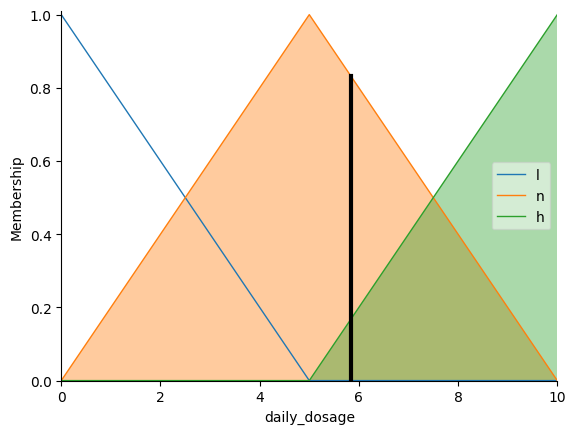

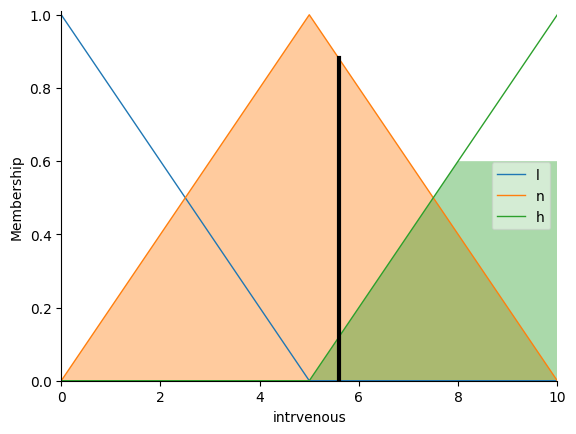

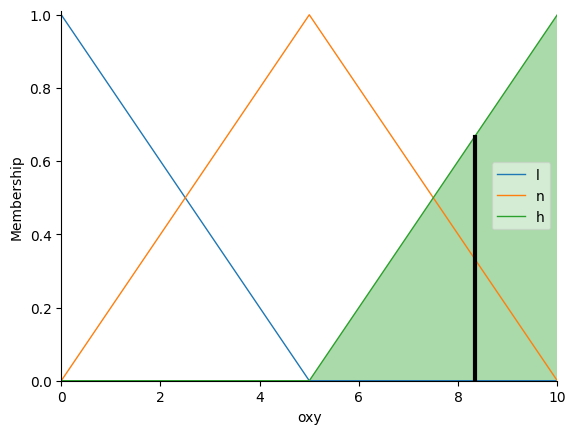

In [ ]:
rule1=ctrl.Rule(heart_rate['l']|blood_pressure['l'],(daily_dosage['h'],intrvenous['h']))
rule2=ctrl.Rule(heart_rate['h']|blood_pressure['h'],daily_dosage['l'])
rule3=ctrl.Rule(heart_rate['n']|blood_pressure['n'],intrvenous['n'])
rule4=ctrl.Rule(body_temperature['h']|oxygen['l'],(oxy['h'],daily_dosage['h']))
rule5=ctrl.Rule(body_temperature['n']|oxygen['n'],daily_dosage['n'])
rule6=ctrl.Rule(body_temperature['l']|oxygen['l'],(oxy['h'],daily_dosage['h']))
rule7=ctrl.Rule(Blood_Sugar_level['h'],daily_dosage['h'])
rule8=ctrl.Rule(Blood_Sugar_level['l'],daily_dosage['l'])
rule9=ctrl.Rule(Blood_Sugar_level['n'],daily_dosage['n'])
rule10=ctrl.Rule(blood_pressure['h']|Blood_Sugar_level['h']|heart_rate['h'],daily_dosage['h'])
rule11=ctrl.Rule(blood_pressure['l']|oxygen['l']|heart_rate['l'],(daily_dosage['h'],intrvenous['h'],oxy['h']))
rule12=ctrl.Rule(blood_pressure['h']|body_temperature['h']|oxygen['n'],(daily_dosage['h'],oxy['h']))
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
control_sim=ctrl.ControlSystemSimulation(control_system)
control_sim.input['heart_rate']=80
control_sim.input['blood_pressure']=100
control_sim.input['body_temperature']=37
control_sim.input['oxygen']=95
control_sim.input['Blood_Sugar_level']=150
control_sim.compute()
print(f"Daily Dosage: {control_sim.output['daily_dosage']}")
print(f"Intrvenous: {control_sim.output['intrvenous']}")
print(f"Oxy: {control_sim.output['oxy']}")
daily_dosage.view(sim=control_sim)
intrvenous.view(sim=control_sim)
oxy.view(sim=control_sim)